### Visual Studio Code ve ilgili Python Extensionları kullanılarak hazırlanmıştır.

### Kütüphanelerin Import Edilmesi

In [59]:
# Import yapıldı
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

### Verilerin alınması ve kontrol edilmesi

In [60]:
# Veri okundu
insurance_data = pd.read_csv("insurance.csv")

In [61]:
# Veri kontrol edildi
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

In [62]:
# BMI istatistikleri
insurance_data["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [63]:
# BMI Dağılımı
insurance_data["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [64]:
# Body Mass Index sistemine göre 25 ve üstü değerler aşırı kilolu(25-30), obez(30-35) ve aşırı obez(35+) insanları gösterir.
# Verimizdeki insanların yaklaşık %75'inin aşırı kilolu, obez veya aşırı obez olduğunu görebiliyoruz.

### “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

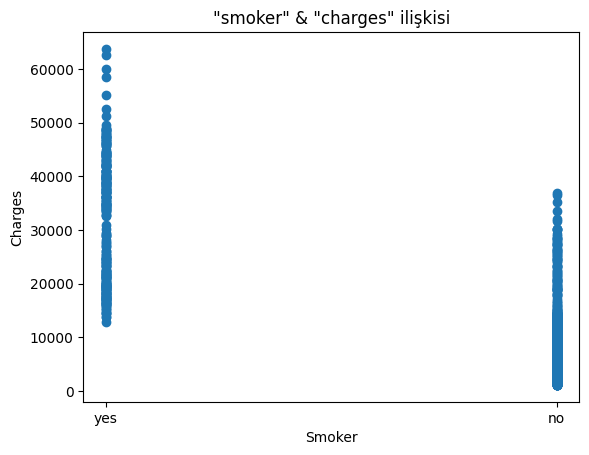

In [65]:
plt.scatter(insurance_data["smoker"], insurance_data["charges"])
plt.title('"smoker" & "charges" ilişkisi')
plt.xlabel('Smoker')
plt.ylabel('Charges')
#Display the chart
plt.show()

In [66]:
#Use the .describe() method to get a summary of the statistics when smoker = yes
insurance_data[insurance_data["smoker"]== "yes"].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [67]:
#Use the .descrbe() method to get a summary of the statistics when smoker = no
insurance_data[insurance_data["smoker"]== "no"].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [68]:
# Hem grafikte hem de smoker yes ve no iken ortaya çıkan charges için ortalama değerlerden, sigara içenler için charges çok daha yüksek olmaktadır. 

### “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

In [69]:
# Her bölgedeki sigara içen ve içmeyenlerin sayısınu bulduk
region_insurance_data = insurance_data.groupby(["region","smoker"])["smoker"].count()
region_insurance_data


region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

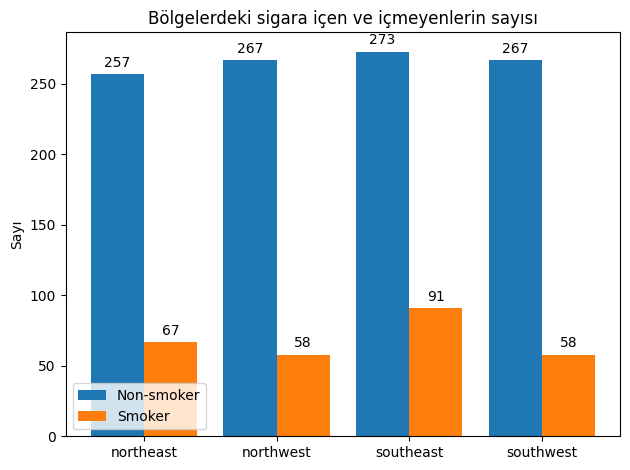

In [70]:
# Yukarıdaki tabloyu kullanarak array'ler oluşturduk.
regions=["northeast","northwest","southeast","southwest"]
non_smoker = [257,267,273,267]
smoker = [67,58,91,58]

# Grouped bar chart ile bulduklarımızı görselleştirdik
x=np.arange(len(regions))
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_smoker, width, label='Non-smoker')
rects2 = ax.bar(x + width/2, smoker, width, label='Smoker')

ax.set_ylabel('Sayı')
ax.set_title('Bölgelerdeki sigara içen ve içmeyenlerin sayısı')
ax.set_xticks(x, regions)
ax.legend(loc=3)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [71]:
# Yukarıdakine benzer şekilde Pie Chart ile de görsel oluşturduk.
region_smoker = insurance_data.groupby(["region","smoker"]).size()
region_smoker


region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
dtype: int64

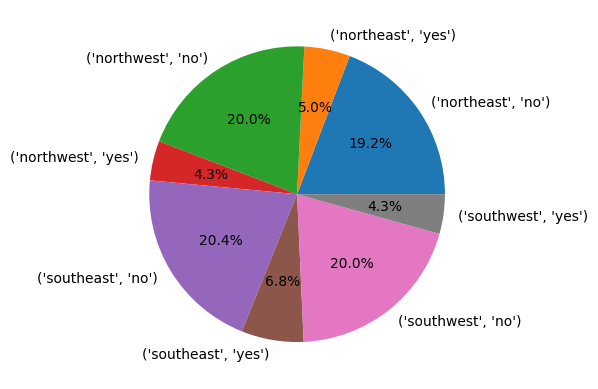

In [72]:
plt.pie(region_smoker, labels = region_smoker.index, autopct='%1.1f%%')
plt.gcf().set_facecolor('white')
plt.show()

In [73]:
# Bu verilere ve grafiklere bakarak en fazla sayıda sigara içen ve içmeyen insan sayısının "southeast" bölgesinde olduğunu,
# sigara içen insan sayısının içmeyen insan sayısına oranının en fazla olduğu bölgenin yine "southeast" olduğunu söyleyebiliriz.

### "bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

In [74]:
sex_bmi = insurance_data.groupby(["sex"])["bmi"].agg(['count','mean','min','max']).reset_index()
sex_bmi

,sex,count,mean,min,max
0,female,662,30.377749,16.815,48.07
1,male,676,30.943129,15.960,53.13


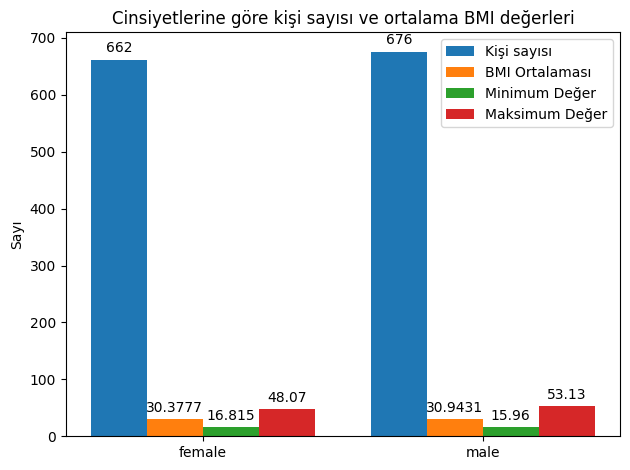

In [75]:
# Grouped bar chart ile bulduklarımızı görselleştirdik
x=np.arange(len(sex_bmi[sex_bmi.columns[0]]))
width = 0.20

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width+width/2), sex_bmi[sex_bmi.columns[1]], width, label='Kişi sayısı')
rects2 = ax.bar(x - width/2, sex_bmi[sex_bmi.columns[2]], width, label='BMI Ortalaması')
rects3 = ax.bar(x + width/2, sex_bmi[sex_bmi.columns[3]], width, label='Minimum Değer')
rects4 = ax.bar(x + (width+width/2), sex_bmi[sex_bmi.columns[4]], width, label='Maksimum Değer')

ax.set_ylabel('Sayı')
ax.set_title('Cinsiyetlerine göre kişi sayısı ve ortalama BMI değerleri')
ax.set_xticks(x, sex_bmi[sex_bmi.columns[0]])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

In [76]:
# Erkeklerin BMI ortalamasının kadınlara göre yaklaşık 0.6 daha yüksek olduğunu, uç noktalarda erkeklerin olduğunu (hem en düşük hem de en yüksek değerler erkeklere ait) görebiliyoruz. 

### En çok “children”’a sahip “region”’ı bulunuz

In [77]:
children_region = insurance_data.groupby(["region"])["children"].agg('count').reset_index()
children_region

,region,children
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [78]:
# Yukarıda da görüldüğü üzere en çok sayıda "children" "southeast" bölgesindedir.

### “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

In [79]:
# BMI değerlerini yaşa göre gruplayıp, bmi için ortalama, minimum ve maksimum değerleri buluyoruz.
age_bmi = insurance_data.groupby(["age"])["bmi"].agg(['mean','min','max']).reset_index()
age_bmi.head()


,age,mean,min,max
0,18,31.326159,15.960,53.13
1,19,28.596912,17.480,44.88
2,20,30.632759,21.800,40.47
3,21,28.185714,16.815,39.49
4,22,31.087679,19.950,52.58


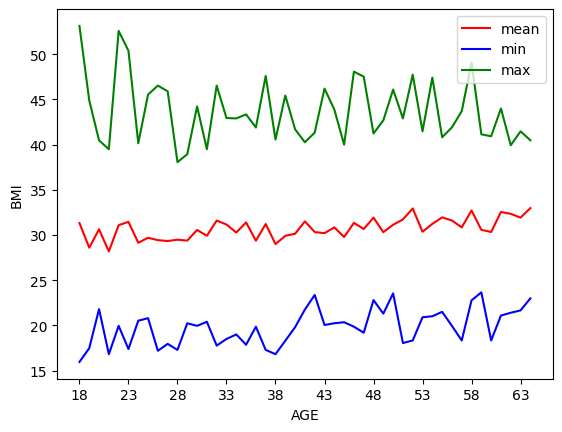

In [80]:
# Yukarıda bulduğumuz veriyi kullanarak grafik çiziyoruz.
plt.plot(age_bmi['age'], age_bmi['mean'], 'r', label='mean')
plt.plot(age_bmi['age'], age_bmi['min'], 'b', label='min')
plt.plot(age_bmi['age'], age_bmi['max'], 'g', label='max')
plt.xticks(np.arange(min(age_bmi['age']), max(age_bmi['age']), 5.0))
plt.xlabel("AGE")
plt.ylabel("BMI")
plt.legend()
plt.show()

In [81]:
# Yukarıdaki tabloya ve grafiğe baktığımızda Yaş ve BMI arasında net bir doğrusal ilişkiden bahsetmek çok zor. 
# Belirli yaş aralıklarında (örneğin 38-42 yaş aralığında BMI ortalamasında artış söz konusu) az da olsa artış ya da azalış eğilimi görülse de genel bir çıkarım yapmak mümkün görünmüyor.

### “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

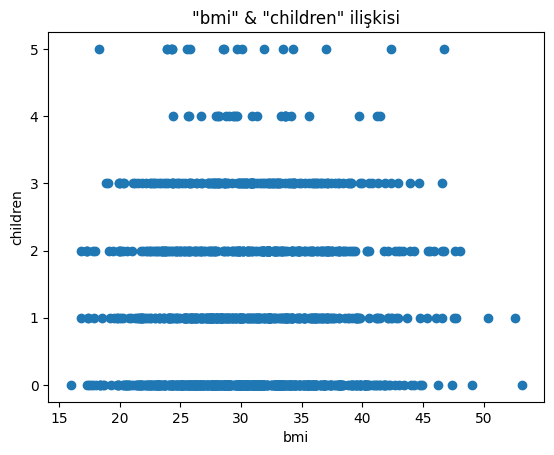

In [82]:
plt.scatter(insurance_data["bmi"], insurance_data["children"])
plt.title('"bmi" & "children" ilişkisi')
plt.xlabel('bmi')
plt.ylabel('children')
#Display the chart
plt.show()

In [83]:
# BMI değerlerini çocuk sayısına göre gruplayıp, bmi için ortalama, minimum ve maksimum değerleri buluyoruz.
age_bmi = insurance_data.groupby(["children"])["bmi"].agg(['count','mean','min','max']).reset_index()
age_bmi

,children,count,mean,min,max
0,0,574,30.550296,15.960,53.13
1,1,324,30.623148,16.815,52.58
2,2,240,30.978104,16.815,48.07
3,3,157,30.684331,18.905,46.53
4,4,25,31.391200,24.415,41.47
5,5,18,29.605000,18.300,46.75


In [84]:
# Çocuk sahibi olmayan ve 1, 2 ya da 3 çocuk sahibi olan bireylerin BMI değerlerinin ortalamasının birbirine çok yakın olduğunu görüyoruz. 
# Bu kişilerde en düşük BMI değerinin çocuk sahibi olmayan bireyde olduğunu ve çocuk sayısı arttıkça bu değerin de arttığından bahsedebiliriz.
# En büyük BMI değerinin ise çocuk sayısı ile ters orantılı olduğunu görüyoruz.
# 4 ve 5 çocuğa sahip bireylerle ilgili veri sayısının analiz için yeterli olmadığını söyleyebiliriz.

### “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

In [85]:
insurance_data.describe()['bmi']

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

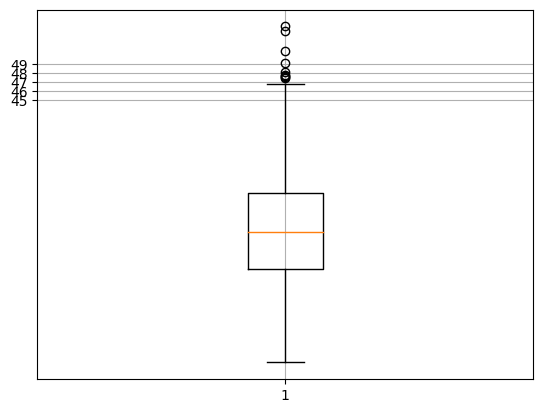

In [86]:
plt.boxplot(insurance_data['bmi'])
plt.grid()
plt.yticks([45,46,47,48,49])
plt.show()

In [87]:
# 47'nin üstündeki BMI değerlerinin outlier olduğunu söyleyebiliriz.

### “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

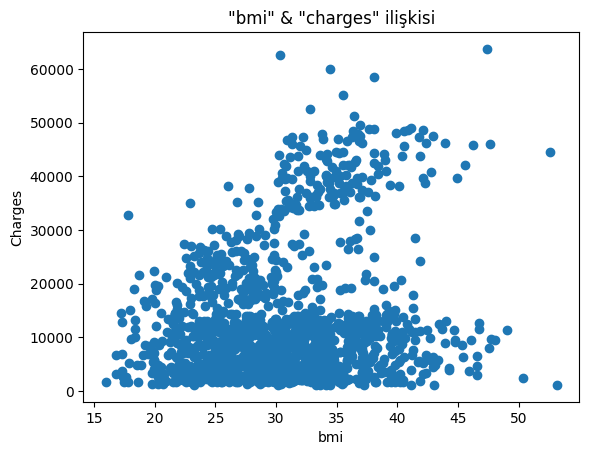

In [88]:
plt.scatter(insurance_data["bmi"], insurance_data["charges"])
plt.title('"bmi" & "charges" ilişkisi')
plt.xlabel('bmi')
plt.ylabel('Charges')
#Display the chart
plt.show()

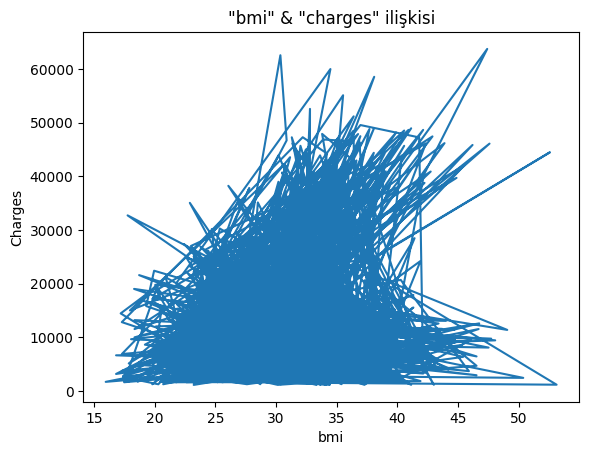

In [89]:
plt.plot(insurance_data["bmi"], insurance_data["charges"])
plt.title('"bmi" & "charges" ilişkisi')
plt.xlabel('bmi')
plt.ylabel('Charges')
#Display the chart
plt.show()

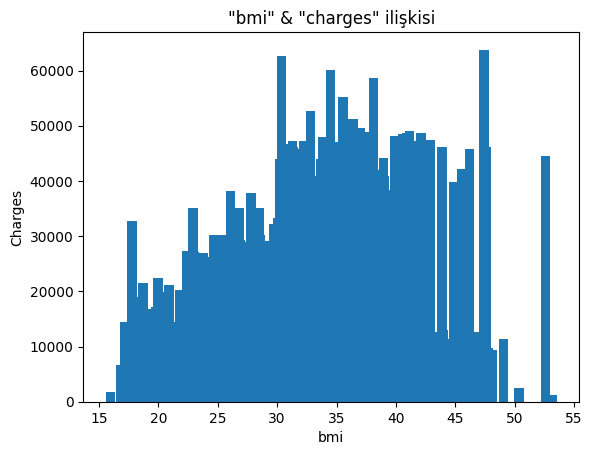

In [90]:
plt.bar(insurance_data["bmi"], insurance_data["charges"])
plt.title('"bmi" & "charges" ilişkisi')
plt.xlabel('bmi')
plt.ylabel('Charges')
#Display the chart
plt.show()

In [91]:
# 15-35 BMI arasında BMI arttıkça "charges" değerinin yükseldiği durumlar olduğundan bahsedebiliriz. 

### “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

In [92]:
# Her bölge ve bu bölgelerdeki sigara içenler ve içmeyenlere göre verimizi gruplandırıp bmi ortalamalarına inceliyoruz.
region_insurance_data_mean = insurance_data.groupby(["region","smoker"])["bmi"].mean()
region_insurance_data_mean

region     smoker
northeast  no        29.332082
           yes       28.565224
northwest  no        29.212678
           yes       29.140431
southeast  no        33.442418
           yes       33.096703
southwest  no        30.507865
           yes       31.005172
Name: bmi, dtype: float64

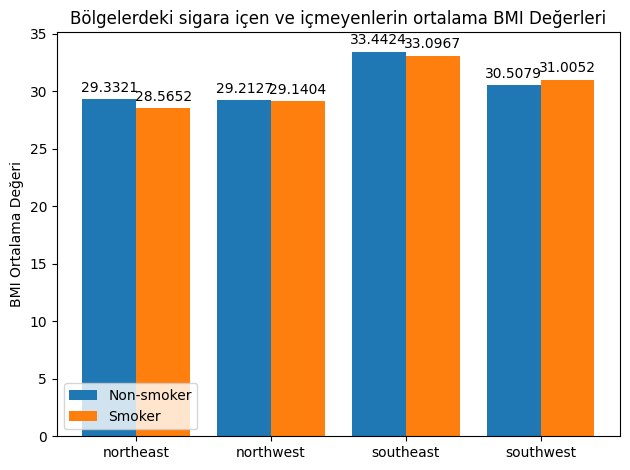

In [93]:
# Yukarıdaki tabloyu kullanarak array'ler oluşturduk.
regions=["northeast","northwest","southeast","southwest"]
non_smoker = [29.332082,29.212678,33.442418,30.507865]
smoker = [28.565224,29.140431,33.096703,31.005172]

# Grouped bar chart ile bulduklarımızı görselleştirdik
x=np.arange(len(regions))
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_smoker, width, label='Non-smoker')
rects2 = ax.bar(x + width/2, smoker, width, label='Smoker')

ax.set_ylabel('BMI Ortalama Değeri')
ax.set_title('Bölgelerdeki sigara içen ve içmeyenlerin ortalama BMI Değerleri')
ax.set_xticks(x, regions)
ax.legend(loc=3)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [94]:
# Aşağıdaki yorumları yapabiliriz:
#   Güneye gittikçe BMI ortalamasının arttığını, güney doğuda BMI ortalamasının daha yüksek olduğunu
#   BMI ortalamasının güney batı bölgesi haricinde sigara içmeyenler için daha yüksek olduğunu
#   Güney doğu bölgesinde hem sigara içenler hem de içmeyenler için en yüksek BMI ortalamasının görüldüğü bölge olduğunu
#   Kuzey doğu bölgesinin sigara içenler için en düşük BMI ortalamasına sahip bölge olduğunu
#   Kuzey batı bölgesinin sigara içenler için en düşük BMI ortalamasına sahip bölge olduğunu

### Veri Ön İşleme

In [95]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [123]:
# Categorical değişkenleri encode etmeliyiz (sex, smoker, region)
# veride belli bir hiyerarşi olmadığı için label encoder yerine one-hot encoder kullanacağız. 
# pandas' get_dummies metodunu kullanalım
data = pd.get_dummies(data = data, columns=["sex", "smoker", "region"])
data.head()
# Labelencoder için gerekli kodları yorum satırı olarak bırakıyoruz
# encoder = LabelEncoder()
# Encode the categorical features to integers
#encoder.fit(data.sex.drop_duplicates())
#data.sex = encoder.transform(data.sex)
#encoder.fit(data.smoker.drop_duplicates())
#data.smoker = encoder.transform(data.smoker)
#encoder.fit(data.region.drop_duplicates())
#data.region = encoder.transform(data.region)

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [124]:
# Box plot ile outlier'lar tespit etmiştik, bunları veriden çıkartacağız.
# Öncelikle BMI değerlerine göre sıralıyoruz.
sorted_bmi = data["bmi"].sort_values()

In [131]:
# Q1, Q2, Q3 and IQR hesaplayalım.
Q1 = np.percentile(sorted_bmi, 25, method = 'midpoint') 
Q2 = np.percentile(sorted_bmi, 50, method = 'midpoint') 
Q3 = np.percentile(sorted_bmi, 75, method = 'midpoint') 
  
print('Q1 25 percentile of the BMI values is, %.3f' % (Q1))
print('Q1 50 percentile of the BMI values is, %.3f' % (Q2))
print('Q1 75 percentile of the BMI values is, %.3f' % (Q3))
IQR = Q3 - Q1 
print('Interquartile range is %.3f' % (IQR))

Q1 25 percentile of the BMI values is, 26.303
Q1 50 percentile of the BMI values is, 30.400
Q1 75 percentile of the BMI values is, 34.688
Interquartile range is 8.385


In [133]:
# En düşük ve en yüksek limitleri bulalım: Q1 – 1.5 IQR ve Q3 + 1.5 IQR
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is %.3f' % (low_lim))
print('up_limit is %.3f' %  (up_lim))

low_limit is 13.725
up_limit is 47.265


In [134]:
# Outlier'ları bulalım
outliers =[]
for x in sorted_bmi:
    if ((x> up_lim) or (x<low_lim)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]


In [136]:
# data'dan outlier'ları çıkarıyoruz

data = data[data["bmi"] < 47.41]
data

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


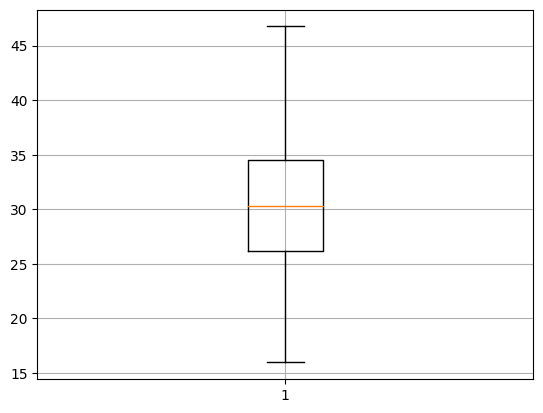

In [138]:
# Outlier'lar artık yok.
plt.boxplot(data['bmi'])
plt.grid()
plt.show()

In [139]:
# Create the X variable for features
X = data.drop(['charges'], axis = 1)

# Create the y variable for output labels
y = data.charges

In [140]:
X

,age,bmi,children,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [141]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [143]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [144]:
# Checking splitted data
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(X_train),type(X_test),type(y_train),type(y_test))

2 2 1 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [145]:
# Converting pandas Series to DataFrames
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [146]:
# Normalizasyon (StandartScaler kullanacağız)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [X_train, X_test, y_train.values.ravel(), y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

[39.26606426 30.64499498  1.08433735  0.49096386  0.50903614  0.79819277
  0.20180723  0.24096386  0.24497992  0.27811245  0.23594378]
[39.01801802 30.21537538  1.13213213  0.51051051  0.48948949  0.78978979
  0.21021021  0.24924925  0.24324324  0.24024024  0.26726727]
[13053.87420402]
[13686.28332537]


### Model Seçimi

In [202]:
# Training and comparing models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Report function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [203]:
# Create an object using LinearRegression
linear_model = LinearRegression()

# Create an object using KNN
knn_model = KNeighborsRegressor() 

# Create an object using Decision Tree
dtree_model = DecisionTreeRegressor()

# Create an object using Random Forest
forest_model = RandomForestRegressor()

# Create an object using XGBoost
xgb_model = XGBRegressor()

In [204]:
regressors = [('Linear Regression', linear_model),
              ('KNN', knn_model),
              ('Decision Tree', dtree_model),
              ('Random Forest', forest_model),
              ('XGBoost', xgb_model)]

In [212]:
# Instantiate the regression model
for regressor_name, model in regressors:
    
    # checking model accuracy 
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='r2')
    print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/5*100,3))+"%")

Linear Regression r2 Score: 75.585%
KNN r2 Score: 21.323%
Decision Tree r2 Score: 70.971%
Random Forest r2 Score: 85.05%
XGBoost r2 Score: 82.891%


In [ ]:
# From the r2 scores we can see that Random Forest is more successful!
# Next we will optimize Random Forest

### Hiper-parametre Optimizasyonu

In [157]:
# Looking at hyperparameters of a random forest regression
from pprint import pprint

print('parameters currently in use:\n')
pprint(forest_model.get_params())

parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [158]:
# We will use Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, 
# and randomly sample from the grid, performing K-Fold CV with each combination of values.
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1.0, 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [173]:
# Now, we instantiate the random search and fit it like any Scikit-Learn model:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [174]:
# We can view the best parameters from fitting the random search:

rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 1.0,
 'max_depth': 40,
 'bootstrap': True}

In [226]:
# Yukarıdaki parametrelerle modelimizi optimize ediyor ve tekrar çalıştırıyoruz.
random_f = RandomForestRegressor(n_estimators=600, min_samples_split=2, min_samples_leaf=4,
                                 max_features=1.0, max_depth=70, bootstrap=True)
random_f.fit(X_train, y_train.values.ravel())

# Accuracy after RandomizedSearchCV Hyper-parameter Optimization
random_f_scores = cross_val_score(random_f, X_train, y_train.values.ravel(), cv=5, scoring="r2")
print("{} r2 Score:".format('RandomizedSearch Hyper-Parametre Optimizasyonu'),str(round(sum(random_f_scores)/5*100,3))+"%")


RandomizedSearch Hyper-Parametre Optimizasyonu r2 Score: 86.843%


In [ ]:
# Random Forest r2 Score: 84.888%
# RandomizedSearch Hyper-Parametre Optimizasyonu r2 Score: 86.843%
# Yaklaşık %2 daha isabetli bir modelimiz oldu.
# Sırada Grid Search Hiper-parametre optimizasyonu var

In [215]:
# Using Grid Search

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300, 400, 500, 600, 1000]
}
# Create a based model
grf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = grf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [216]:
# Fit the grid search to the data and find best parameters
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 567 candidates, totalling 1701 fits


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 400}

In [225]:
# Yukarıda bulduğumuz hiper-parametrelerle modelimizi tekrar oluşturuyoruz.
grid_f = RandomForestRegressor(n_estimators=400, min_samples_split=4, min_samples_leaf=3,
                                 max_features=3, max_depth=70, bootstrap=True)
grid_f.fit(X_train, y_train.values.ravel())

# Accuracy after Grid Search Hyper-parameter Optimization
grid_f_scores = cross_val_score(grid_f, X_train, y_train.values.ravel(), cv=5, scoring="r2")
print("{} r2 Score:".format('GridSearchCV Hyper-Parametre Optimizasyonu'),str(round(sum(grid_f_scores)/5*100,3))+"%")

GridSearchCV Hyper-Parametre Optimizasyonu r2 Score: 85.731%


In [ ]:
# Grid Search yöntemi ile %86'nın altında kaldık. RandomizedSearchCV ile devam edeceğiz.

### Modeli Değerlendirme

In [234]:
# RandomizedSearchCV yöntemi ile elde ettiğimiz parametreleri kullanarak modeli değerlendireceğiz.
# MSE,, RMSE, MAE and r2_score
mse = cross_val_score(random_f, X_train, y_train.values.ravel() ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of Random Forest:", (mse))

rmse = cross_val_score(random_f, X_train, y_train.values.ravel() ,cv=5, scoring = "neg_root_mean_squared_error")
print("Root Mean Squared Error of Random Forest:", (rmse))

mae = cross_val_score(random_f, X_train, y_train.values.ravel() ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of Random Forest:", (mae))

r2 = cross_val_score(random_f, X_train, y_train.values.ravel() ,cv=5, scoring = "r2").mean() 
print("r2 Score of Random Forest with RandomizedSearch Hyper-parameter optimization:",str(round(r2*100,4))+"%\n")

Mean Squared Error of Random Forest: [-21997493.60224887  -9752570.21055202 -26966975.26885488
 -17774163.41611752 -15162225.13314258]
Root Mean Squared Error of Random Forest: [-4687.21121364 -3098.90348278 -5185.16816114 -4219.17483618
 -3899.08104808]
Mean Absolute Error of Random Forest: [-2374.70714471 -1989.41401402 -2511.58576567 -2245.28319366
 -2142.26778674]
r2 Score of Random Forest with RandomizedSearch Hyper-parameter optimization: 86.8961%



### GitHub Linki aşağıda verilmiştir.
https://github.com/mcagrisahin/Project01.git